In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import numpy as np 
from Tech_Index import *
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# absolute percent error 
def metric(prediction, truth):
    aape = (abs(prediction - truth) / truth).mean()
    return aape
def performance(model, X_train, y_train, X_test, y_test):
    pred1 = model.predict(X_train)
    pred2 = model.predict(X_test)
    aape1 = metric(pred1, y_train.values)
    aape2 = metric(pred2, y_test.values)
    print('Training error:%.5f' %aape1)
    print('Testing error:%.5f' %aape2)

In [12]:
# Loading data 
# data = pd.read_csv('../Data/Data_March_X10_Y5.csv') # data with previous 5 Ys
data = pd.read_csv('Data/train_March_X10_Y0_v1.csv') # data with 'EMA', 'MOM', 'ROC'... calculated from previous Ys
data2 = pd.read_csv('../Data/train_May_X10_Y0_v1.csv') # data with 'EMA', 'MOM', 'ROC'... calculated from previous Ys
data3 = pd.read_csv('../Data/train_July_X10_Y0_v1.csv') # data with 'EMA', 'MOM', 'ROC'... calculated from previous Ys
data.columns.values

FileNotFoundError: [Errno 2] File b'../Data/train_March_X10_Y0_v1.csv' does not exist: b'../Data/train_March_X10_Y0_v1.csv'

In [542]:
data 

,Unnamed: 0,date,price,EMA,MOM,ROC,12day MA,26day MA,Std_dev,Copp,...,9_0,10_0,11_0,12_0,13_0,14_0,15_0,16_0,17_0,18_0
0,0,2018-04-05,996.00,999.449501,-6.25,-0.007968,1000.375000,1004.134615,7.674226,-0.014772,...,33.43,37.00,55.5,39.69,65.00,34.46,313.52,228.75,165.00,205.00
1,1,2018-04-06,995.50,998.841885,-8.50,-0.007478,999.854167,1003.740385,5.029289,-0.015219,...,33.43,37.00,55.5,39.69,65.00,34.46,313.52,228.75,165.00,205.00
2,2,2018-04-07,995.50,998.841885,-8.50,-0.007478,999.854167,1003.740385,5.029289,-0.015219,...,33.43,37.00,55.5,39.69,65.00,34.46,313.52,228.75,165.00,205.00
3,3,2018-04-08,995.50,998.841885,-8.50,-0.007478,999.854167,1003.740385,5.029289,-0.015219,...,33.43,37.00,55.5,39.69,65.00,34.46,313.52,228.75,165.00,205.00
4,4,2018-04-09,998.25,998.750826,-4.75,-0.004488,999.145833,1003.355769,4.580529,-0.015396,...,33.43,37.00,55.5,39.69,65.00,34.46,313.52,228.75,165.00,205.00
5,5,2018-04-10,1003.75,999.519930,1.00,0.001997,998.750000,1003.067308,5.496021,-0.012643,...,33.43,37.00,55.5,39.69,65.00,34.46,313.52,228.75,165.00,205.00
6,6,2018-04-11,1002.50,999.978402,0.75,0.001248,998.833333,1003.182692,3.755829,-0.010813,...,33.43,37.00,55.5,39.69,65.00,34.46,313.52,228.75,165.00,205.00
7,7,2018-04-12,1000.00,999.981725,-1.25,0.003261,998.895833,1003.096154,3.302461,-0.009802,...,32.27,34.25,54.8,38.65,65.20,33.96,319.22,232.50,185.00,209.17
8,8,2018-04-13,997.50,999.599921,0.75,0.004279,998.791667,1002.625000,2.684446,-0.008983,...,32.27,34.25,54.8,38.65,65.20,33.96,319.22,232.50,185.00,209.17
9,9,2018-04-14,997.50,999.599921,0.75,0.004279,998.791667,1002.625000,2.684446,-0.008983,...,32.27,34.25,54.8,38.65,65.20,33.96,319.22,232.50,185.00,209.17


In [518]:
cutoff = data.index[data.date == '2019-06-30'].tolist()[0]
train = data[0: (cutoff+1)] # up to 2019/6/30
test = data[(cutoff+1): ]

In [519]:
y_train, y_test = train['price'], test['price']
X_train, X_test = train.drop(['Unnamed: 0', 'price', 'date'], axis=1), test.drop(['Unnamed: 0', 'price', 'date'], axis=1)

In [520]:
# Fit linear regression
lin1 = LinearRegression()
lin1.fit(X_train, y_train)
performance(lin1, X_train, y_train, X_test, y_test)

Training error:0.00170
Testing error:0.01300


In [521]:
y_pred = model.predict(X_train)

In [ ]:
# plt.plot(range(len(y_pred)), np.array(y_pred), label='predicted')
plt.plot(range(len(y_train)), np.array(y_train), color='red', label='truth')
plt.legend()

# MLP Model

# Test error

In [523]:
## test error
# to predict 07/01 - ... use y_train ended at 06/31
test = test.reset_index().drop(['index'], axis=1)
test = prediction_sequential(test, model, y_train) # return predicted value, inplace return

In [524]:
y_pred = test.price

In [525]:
metric(np.array(y_pred), np.array(y_test))

0.09050467409702204

In [6]:
plt.plot(range(len(y_pred)), np.array(y_pred), label='predicted')
plt.plot(range(len(y_test)), np.array(y_test), color='red', label='truth')
plt.legend()

NameError: name 'y_pred' is not defined

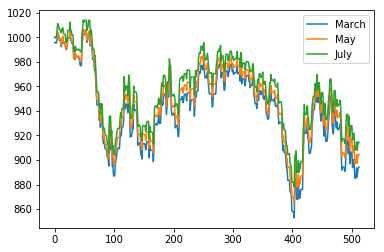

In [543]:
plt.plot(range(len(data.price)), np.array(data.price), label='March')
plt.plot(range(len(data2.price)), np.array(data2.price), label='May')
plt.plot(range(len(data3.price)), np.array(data3.price), label='July')
plt.legend()

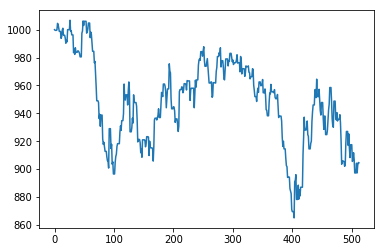

In [529]:
plt.plot(range(len(data2.price)), np.array(data2.price), label='predicted')

# Coefficients

In [446]:
lin1.coef_

array([ 7.18936485e-01,  1.13907821e-01,  9.10526534e+01,  8.98034409e-01,
       -7.85738579e-01,  8.16141297e-02,  8.79991980e+01,  1.71317183e+01,
        1.68760348e+01, -3.88325091e+04,  2.87785946e+00,  3.11425460e+00,
       -2.36395710e-01, -2.55944721e-01,  2.14711691e-01, -5.04641485e-02,
        2.53148445e-02,  1.66234537e-01,  1.46257231e-03,  5.96492963e-01,
        1.09152375e-01, -7.08149205e-02,  3.58910717e-01,  1.02947022e-01,
        7.22165523e-02,  9.75727995e-02,  1.29337706e-01,  9.98630410e-02,
        2.32750543e-01,  1.52239219e-01,  7.49166287e-02, -7.62503660e-02,
        1.32953591e-01, -2.94858872e-02,  5.16867403e-02,  4.38740962e-02,
       -2.09649228e-02, -1.37753605e-01,  6.23491975e-02, -9.55961499e-02,
       -3.12020172e-01,  1.61917517e-02,  5.77857501e-02, -2.29670616e-01,
        5.29701692e-02, -3.37077775e-02, -3.02355030e-02, -4.09211577e-02,
        2.48809270e-02,  4.45618578e-02, -2.23930513e-02, -1.63016292e+00,
       -1.15349902e+00, -

In [445]:
lin1.intercept_

263.2513769132927

# Prediction

In [409]:
prediction = pd.read_csv('../Data/prediction_March_X10_Y0_v1.csv')

In [410]:
prediction

,Unnamed: 0,date,price,EMA,MOM,ROC,12day MA,26day MA,Std_dev,Copp,...,9_0,10_0,11_0,12_0,13_0,14_0,15_0,16_0,17_0,18_0
0,513,2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
1,514,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
2,515,2019-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
3,516,2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
4,517,2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
5,518,2019-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
6,519,2019-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
7,520,2019-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
8,521,2019-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
9,522,2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50


In [1]:
# sequential prediction 
# from predict 
# to predict 8/31 - ... use y_train ended at 8/30
# to predict 07/01 - ... use y_train ended at 06/31
def prediction_sequential(prediction, model, y_train):
    y_pre = pd.DataFrame(y_train) 
    y_pre.rename(columns={'price': 'Close'}, inplace=True) # change column names 
    for i in range(len(prediction)):
        # predict y_i using index(y_i-1, y_i-2) and X_i 
        # X_i = prediction.iloc[i, 16:]
        # get index_i from previous y's 
        y_pre = y_pre.append(y_pre.iloc[0, ], ignore_index=True) # add y_i as new row 
        y_pre = tech_financial(y_pre) # add index rows 
        index_i = y_pre[['EMA', 'MOM', 'ROC', '12day MA', '26day MA', 'Std_dev', 'Copp',
       'B1', 'B2', 'Trix', 'MACD', 'MACDsign', 'MACDdiff']].iloc[len(y_pre)-1, ]
        
        # predict next y_i using X_i, index_i 
        prediction.at[i, 3:16] = index_i.tolist()
        #################
        temp = model.predict(prediction.iloc[i:(i+1), 3:])
        #################
        prediction.at[i, 'price'] = temp[0] # temp is predicted stock price for one day: eg. [3]
        # update y_pre 
        y_pre.at[len(y_pre)-1, 'Close'] = temp[0]
    return prediction

In [490]:
# to predict 8/31 - ... use y_train ended at 8/30
y_train = data.price 

In [491]:
prediction = prediction_sequential(prediction, model, y_train)

In [492]:
prediction

,Unnamed: 0,date,price,EMA,MOM,ROC,12day MA,26day MA,Std_dev,Copp,...,9_0,10_0,11_0,12_0,13_0,14_0,15_0,16_0,17_0,18_0
0,513,2019-08-31,969.186734,909.302813,102.250000,0.112538,891.708333,898.913462,46.789088,0.008940,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
1,514,2019-09-01,978.874504,919.150357,100.750000,0.106359,897.994728,901.814874,49.763184,0.032312,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
2,515,2019-09-02,985.089797,928.744025,95.750000,0.112228,904.963437,905.204278,48.732309,0.053944,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
3,516,2019-09-03,989.987787,937.670835,100.500000,0.125106,912.033420,908.794271,40.557619,0.077367,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
4,517,2019-09-04,990.547595,945.861898,110.750000,0.125106,919.907402,911.966878,10.327106,0.100275,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
5,518,2019-09-05,993.071015,952.865671,110.750000,0.125106,928.682201,914.834093,6.444679,0.118864,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
6,519,2019-09-06,995.348609,959.120434,110.750000,0.114717,937.667286,917.798363,4.044453,0.136236,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
7,520,2019-09-07,997.956856,964.709417,102.500000,0.123836,946.842170,920.850232,2.720676,0.151982,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
8,521,2019-09-08,1000.990493,969.778091,109.750000,0.116592,955.546908,924.415881,2.852522,0.167472,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
9,522,2019-09-09,1007.564352,974.461881,104.000000,0.114094,965.108616,927.761669,2.977846,0.180358,...,27.86,37.13,54.0,35.44,65.25,27.94,304.26,216.50,166.50,241.50
